Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import time
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, f1_score
import pandas as pd

In [4]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

## baseline

modify hidden_layer_sizes, activation_functions, solver, learning_rate, learning_rate_init, alpha, early_stopping

In [5]:
# 1 hidden layer with 100 neurons
# adam optimizer, early_stopping is true

mlp = MLPClassifier(
    hidden_layer_sizes=100,
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='constant',
    learning_rate_init=0.001,
    # verbose=True,
    early_stopping=True,
)

start = time.time()
mlp.fit(X_train, y_train)
end = time.time()
training_time = end - start
print(f"Training time: {training_time:.2f} seconds")

Training time: 5.21 seconds


In [6]:
y_pred = mlp.predict(X_test)
y_proba = mlp.predict_proba(X_test) # auc

In [7]:
# training and convergence

print(f"Model converged in {mlp.n_iter_} epochs (max_iter was {mlp.max_iter}).")
print(f"Final training loss: {mlp.loss_:.4f}\n")

Model converged in 20 epochs (max_iter was 200).
Final training loss: 0.1252



In [8]:
# classification result

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=class_names)
print(f"Accuracy: {acc:.4f}")
print(report)

Accuracy: 0.8831
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.84      0.84      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.80      0.81      0.81      1000
       Dress       0.89      0.88      0.88      1000
        Coat       0.77      0.84      0.81      1000
      Sandal       0.97      0.94      0.95      1000
       Shirt       0.74      0.67      0.70      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.97      0.96      0.96      1000
  Ankle boot       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [9]:
# roc score (one vs rest for multi-class classification)

auc_macro = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')

auc_weighted = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')

print(f"AUC (macro): {auc_macro:.4f}")
print(f"AUC (weighted): {auc_weighted:.4f}")

AUC (macro): 0.9903
AUC (weighted): 0.9903


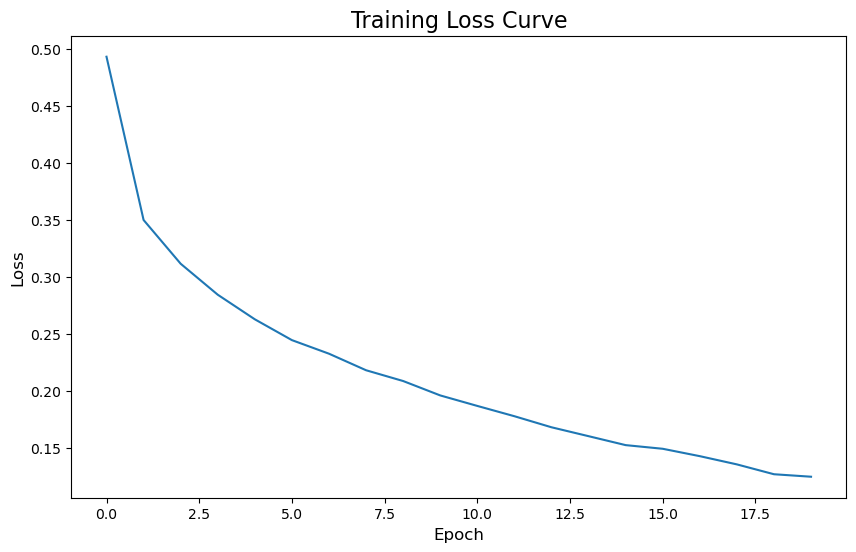

In [10]:
# training loss curve

plt.figure(figsize=(10,6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Curve', fontsize=16)
# plt.grid(True)
plt.annotate(
    f'Convergence at Epoch {mlp.n_iter_}',
    xy=(mlp.n_iter_, mlp.loss_curve_[-1]),
    xytext=(mlp.n_iter_ - 4, mlp.loss_curve_[-1] + 0.1),
    # arrowprops=dict(facecolor='black', shrink=0.05),
    horizontalalignment='center',
)
plt.show()

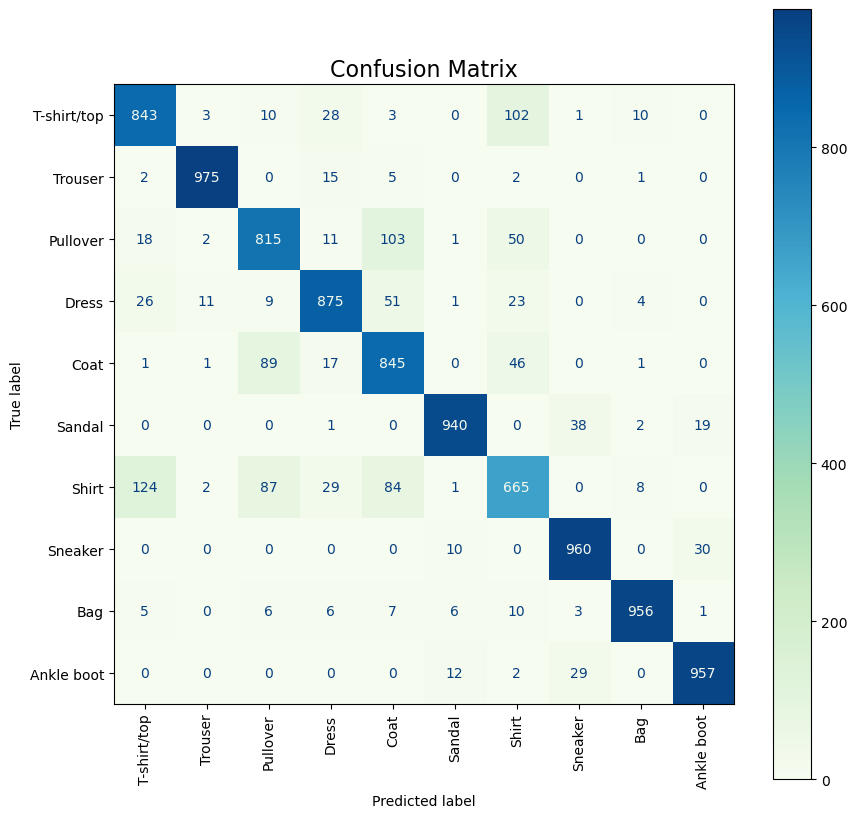

In [11]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.GnBu, ax=ax, xticks_rotation='vertical')
plt.title("Confusion Matrix", fontsize=16)
plt.show()


## ablation study

In [12]:
ablation_configs = [
    {'name': 'Study 1', 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 2', 'hidden_layer_sizes': (50,50,50), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 3', 'hidden_layer_sizes': (300,100), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 4', 'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 5', 'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 6', 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver':'sgd', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 7', 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.01, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 8', 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver':'sgd', 'learning_rate_init':0.0001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 9', 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.1, 'early_stopping':False},
    {'name': 'Study 10', 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':True},
    {'name': 'Study 11', 'hidden_layer_sizes': (50,50,50), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.1, 'early_stopping':False},
    {'name': 'Study 12', 'hidden_layer_sizes': (300,100), 'activation': 'tanh', 'solver':'sgd', 'learning_rate_init':0.01, 'alpha': 0.0001, 'early_stopping':True},
]

results = {}
all_loss_curves = {}
all_cms = {}
summary_metrics = []

for config in ablation_configs:
  ablation_name = config.pop('name')
  print(f" training {ablation_name} ")

  mlp = MLPClassifier(**config)

  start = time.time()
  mlp.fit(X_train, y_train)
  end = time.time()

  y_pred = mlp.predict(X_test)
  y_proba = mlp.predict_proba(X_test) # auc
  # acc = accuracy_score(y_test, y_pred)

  all_loss_curves[ablation_name] = mlp.loss_curve_
  all_cms[ablation_name] = confusion_matrix(y_test, y_pred)

  summary_metrics.append({
      'ablation_name': ablation_name,
      'Accuracy': accuracy_score(y_test, y_pred),
      'F1 (weighted)': f1_score(y_test, y_pred, average='weighted'),
      'AUC (weighted)': roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted'),
      'Epochs': mlp.n_iter_,
      'Training time (s)': end - start,
  })
  print(f"Model converged in {mlp.n_iter_} epochs (max_iter was {mlp.max_iter}).")
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

 training Study 1 
Model converged in 103 epochs (max_iter was 200).
Accuracy: 0.8811

 training Study 2 
Model converged in 116 epochs (max_iter was 200).
Accuracy: 0.8691

 training Study 3 
Model converged in 60 epochs (max_iter was 200).
Accuracy: 0.8929

 training Study 4 
Model converged in 155 epochs (max_iter was 200).
Accuracy: 0.8738

 training Study 5 
Model converged in 75 epochs (max_iter was 200).
Accuracy: 0.8739

 training Study 6 


/home/desmond/miniconda3/envs/mds_hw3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model converged in 200 epochs (max_iter was 200).
Accuracy: 0.8844

 training Study 7 
Model converged in 51 epochs (max_iter was 200).
Accuracy: 0.8550

 training Study 8 


/home/desmond/miniconda3/envs/mds_hw3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model converged in 200 epochs (max_iter was 200).
Accuracy: 0.8630

 training Study 9 
Model converged in 134 epochs (max_iter was 200).
Accuracy: 0.8852

 training Study 10 
Model converged in 27 epochs (max_iter was 200).
Accuracy: 0.8824

 training Study 11 
Model converged in 131 epochs (max_iter was 200).
Accuracy: 0.8786

 training Study 12 
Model converged in 21 epochs (max_iter was 200).
Accuracy: 0.8810



In [13]:
summary_df = pd.DataFrame(summary_metrics)
print(summary_df)

   ablation_name  Accuracy  F1 (weighted)  AUC (weighted)  Epochs  \
0        Study 1    0.8811       0.880926        0.988925     103   
1        Study 2    0.8691       0.869574        0.987146     116   
2        Study 3    0.8929       0.893229        0.990972      60   
3        Study 4    0.8738       0.873785        0.988355     155   
4        Study 5    0.8739       0.873935        0.987811      75   
5        Study 6    0.8844       0.884476        0.989911     200   
6        Study 7    0.8550       0.855695        0.983118      51   
7        Study 8    0.8630       0.862333        0.987847     200   
8        Study 9    0.8852       0.885280        0.990091     134   
9       Study 10    0.8824       0.880871        0.990278      27   
10      Study 11    0.8786       0.879015        0.988357     131   
11      Study 12    0.8810       0.880467        0.990389      21   

    Training time (s)  
0           27.885192  
1           27.467706  
2           40.679153  
3     

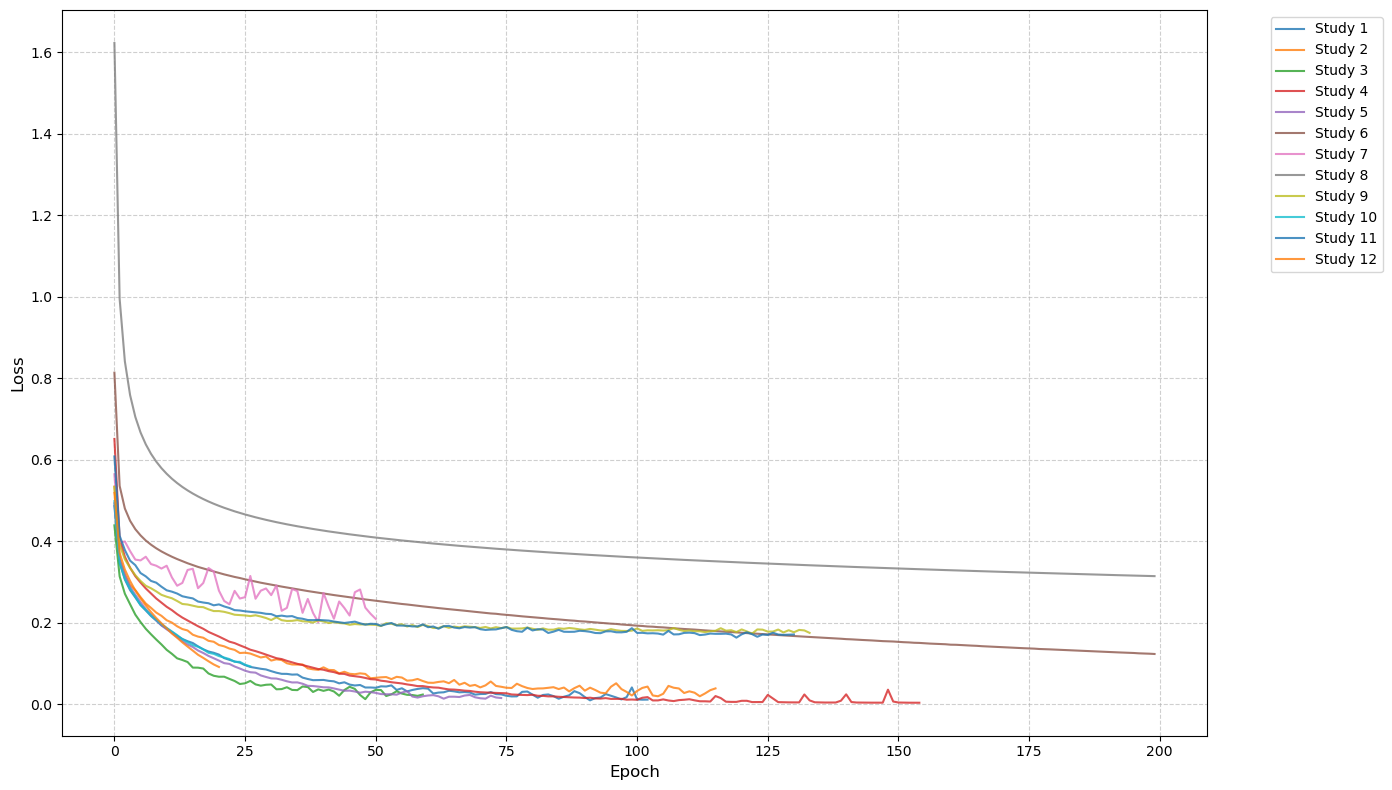

In [14]:
plt.figure(figsize=(14, 8))

for name, loss_curve in all_loss_curves.items():
    plt.plot(loss_curve, label=name, alpha=0.8)

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

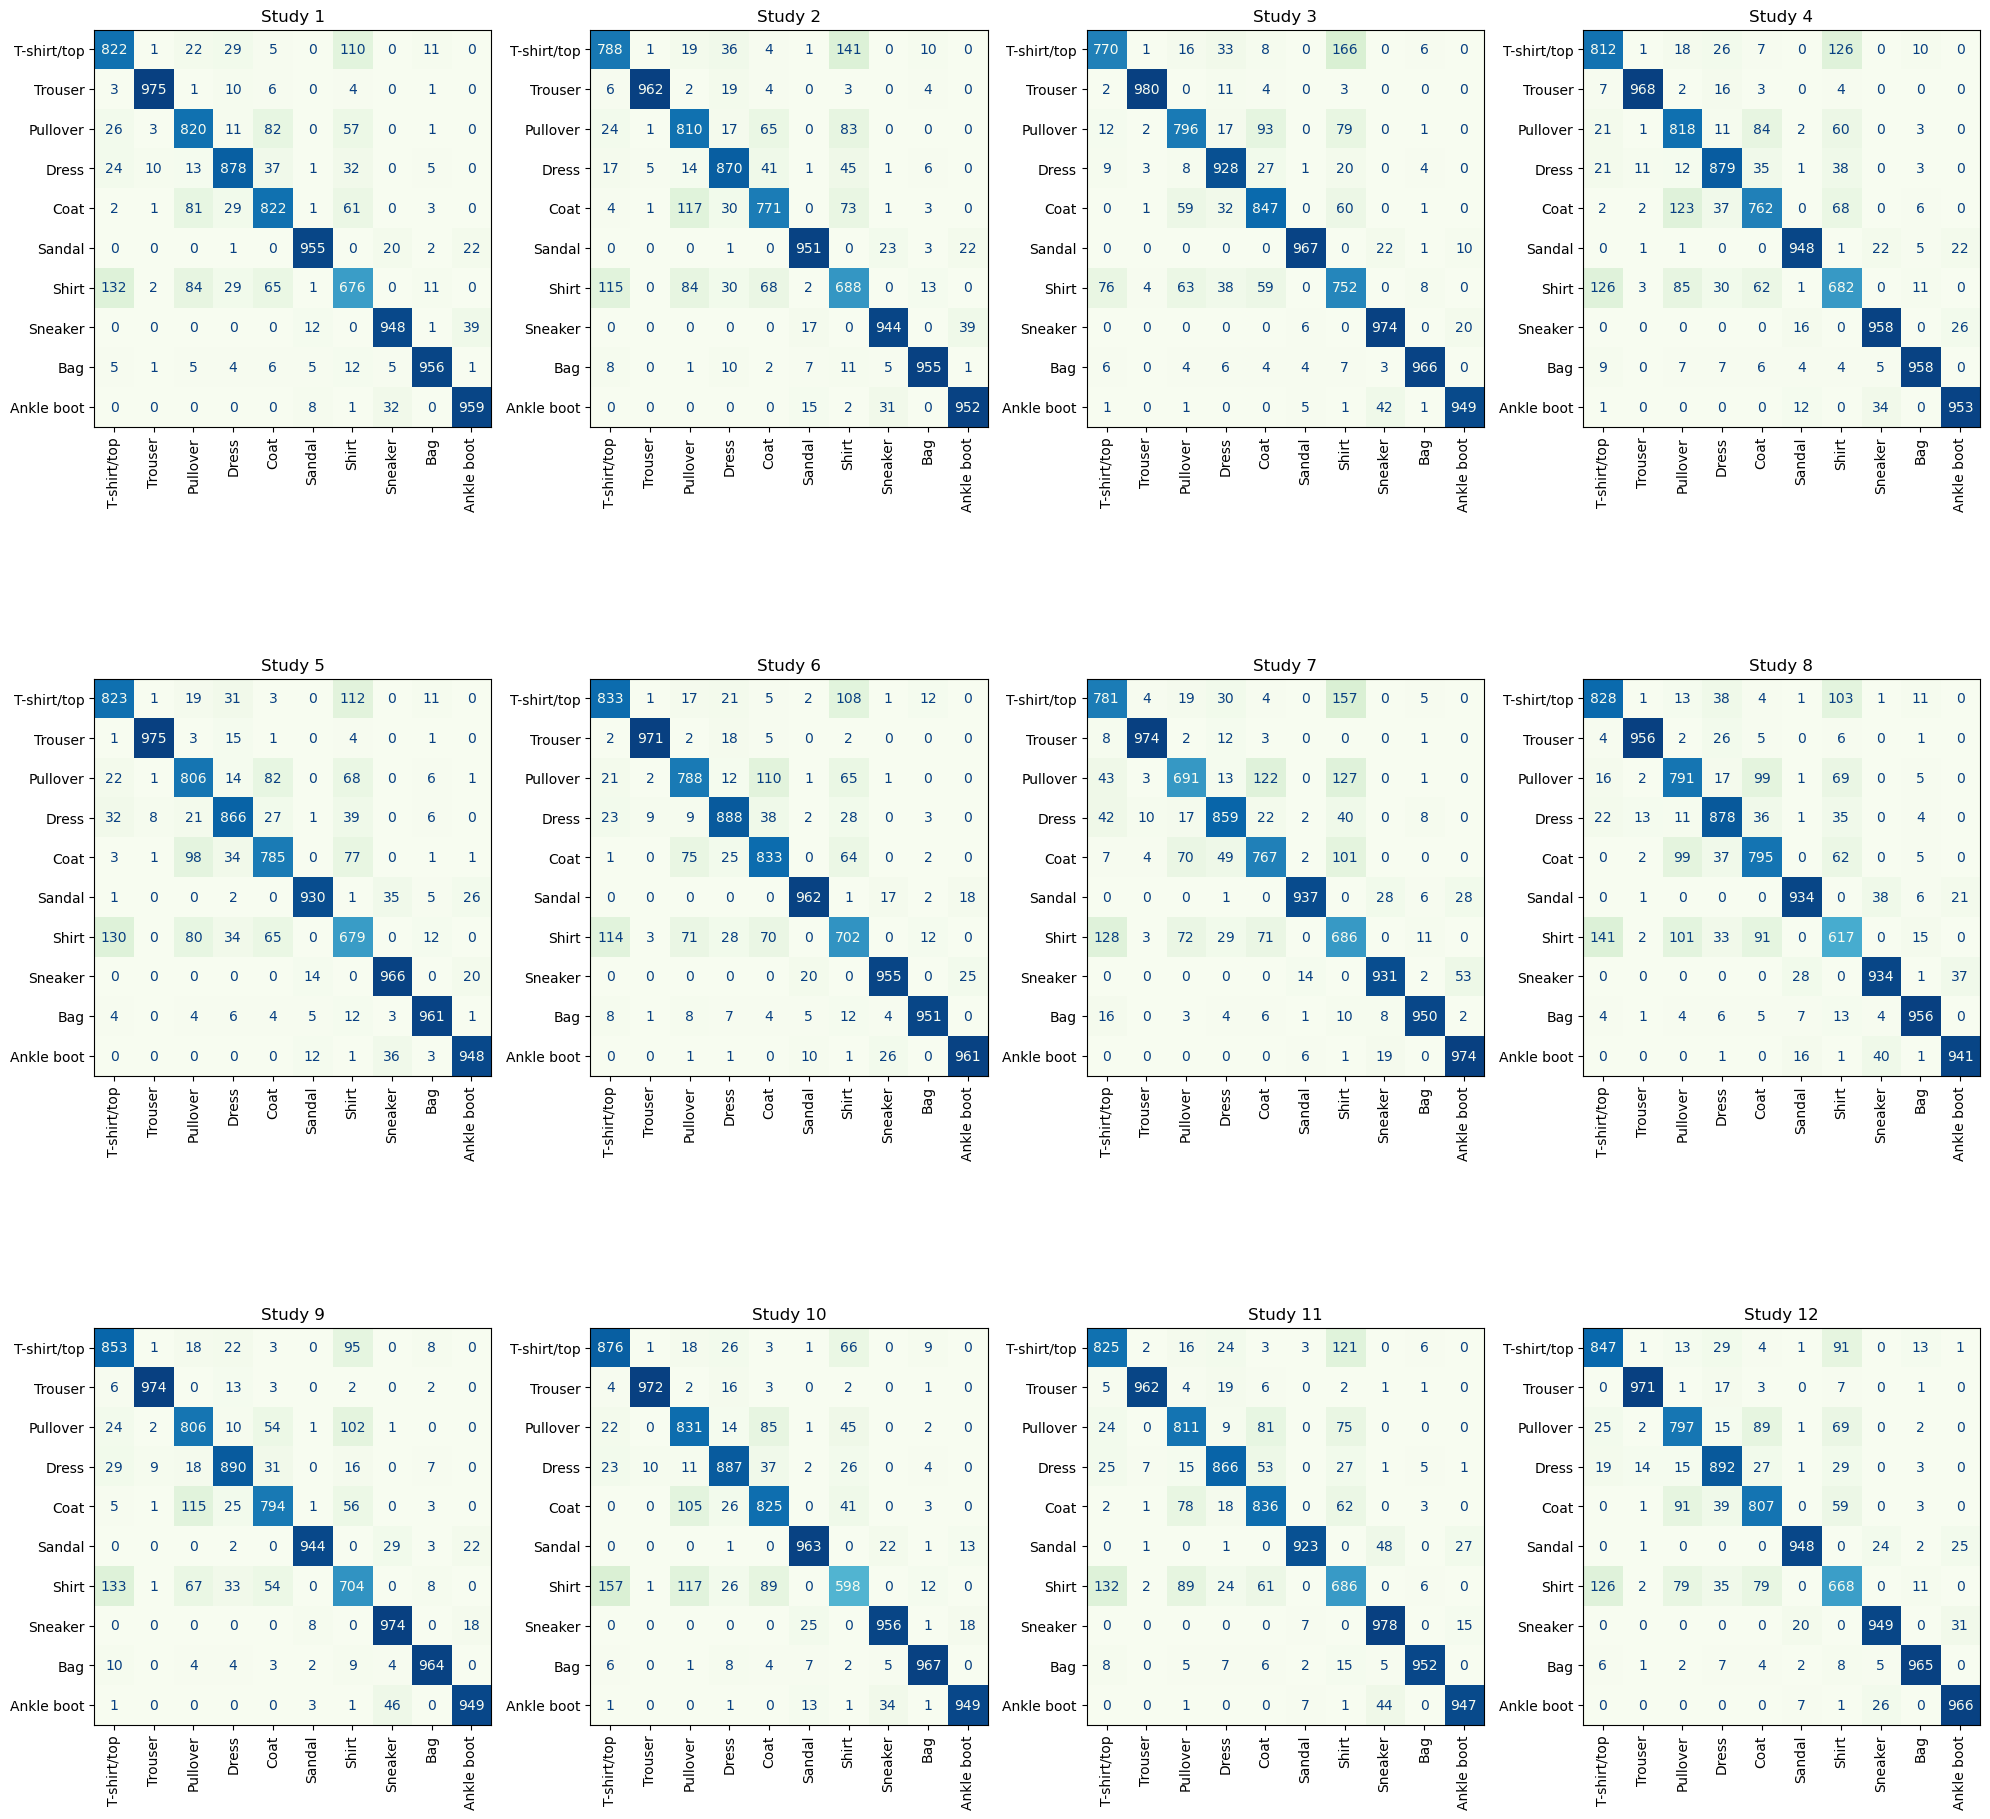

In [15]:
# create a 3x4 grid for 12 plots

fig, axes = plt.subplots(3, 4, figsize=(20, 20))
axes_flat = axes.flatten()

if len(all_cms) > len(axes_flat):
    print("Warning: More ablations than available subplots. Some CMs won't be plotted.")

for i, (name, cm) in enumerate(all_cms.items()):
    if i >= len(axes_flat):
        break

    ax = axes_flat[i]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    disp.plot(cmap=plt.cm.GnBu, ax=ax, xticks_rotation='vertical', colorbar=False)
    ax.set_title(name, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

# fig.colorbar(disp.im_, ax=axes.ravel().tolist(), shrink=0.7)
plt.tight_layout()
plt.show()

# 3. Fashion-MNIST image classification  using pytorch

In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 1, 28, 28)
X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:,  None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

BATCH_SIZE = 128
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE * 2, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE * 2, shuffle=False)

2025-10-29 21:07:44.790990: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-29 21:07:44.825459: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-29 21:07:47.523294: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Using device:", device)

device = torch.device('cpu')

In [6]:
import time
import torchvision.models as models
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Define class names for plotting
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


In [ ]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs, scheduler=None, model_name="Model"):
    """
    Generic training loop for a PyTorch model.
    """
    print(f"--- Training {model_name} ---")
    start_time = time.time()
    
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    model.to(device)

    for epoch in range(num_epochs):
        # --- Training Phase ---
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Repeat grayscale channel 3 times and resize for ViT
            if "ViT" in model_name:
                # (N, 1, 28, 28) -> (N, 3, 28, 28)
                inputs = inputs.repeat(1, 3, 1, 1) 
                # (N, 3, 28, 28) -> (N, 3, 224, 224)
                inputs = nn.functional.interpolate(inputs, size=(224, 224), mode='bilinear', align_corners=False)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
        epoch_train_loss = running_train_loss / len(train_loader.dataset)
        epoch_train_acc = correct_train / total_train
        
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                if "ViT" in model_name:
                    inputs = inputs.repeat(1, 3, 1, 1)
                    inputs = nn.functional.interpolate(inputs, size=(224, 224), mode='bilinear', align_corners=False)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                running_val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        epoch_val_acc = correct_val / total_val

        history['train_loss'].append(epoch_train_loss)
        history['train_acc'].append(epoch_train_acc)
        history['val_loss'].append(epoch_val_loss)
        history['val_acc'].append(epoch_val_acc)
        
        print(f"Epoch {epoch+1}/{num_epochs} | "
              f"Train Loss: {epoch_train_loss:.4f} - Train Acc: {epoch_train_acc:.4f} | "
              f"Val Loss: {epoch_val_loss:.4f} - Val Acc: {epoch_val_acc:.4f}")
        if scheduler and isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(epoch_val_loss)
        elif scheduler:
            scheduler.step()
            
    end_time = time.time()
    train_time = end_time - start_time
    print(f"Finished Training. Total time: {train_time:.2f}s")
    
    return history, train_time

def evaluate_model(model, test_loader):
    """
    Evaluates the model on the test set and returns accuracy and predictions.
    """
    model.to(device)
    model.eval()
    
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            if "ViT" in model_name:
                inputs = inputs.repeat(1, 3, 1, 1)
                inputs = nn.functional.interpolate(inputs, size=(224, 224), mode='bilinear', align_corners=False)
            
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
    acc = accuracy_score(all_labels, all_preds)
    return acc, all_labels, all_preds

def plot_metrics(history, model_name):
    """
    Plots training & validation accuracy and loss.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f'{model_name} - Training Metrics', fontsize=16)

    ax1.plot(history['train_acc'], label='Train Accuracy')
    ax1.plot(history['val_acc'], label='Validation Accuracy')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history['train_loss'], label='Train Loss')
    ax2.plot(history['val_loss'], label='Validation Loss')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

def plot_confusion_matrix(all_labels, all_preds, class_names, model_name):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(all_labels, all_preds)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=16)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

results = {}

In [ ]:
# Multi-layer perceptron or fully connected network (FCN)

class FCN(nn.Module):
    def __init__(self):
        super(FCN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc_stack = nn.Sequential(
            nn.Linear(1 * 28 * 28, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.fc_stack(x)
        return logits

In [9]:
NUM_EPOCHS = 20
criterion = nn.CrossEntropyLoss()

In [10]:
torch.cuda.empty_cache() if torch.cuda.is_available() else None

--- Training FCN (SGD) ---
Epoch 1/20 | Train Loss: 0.9259 - Train Acc: 0.6719 | Val Loss: 0.5558 - Val Acc: 0.8020
Epoch 2/20 | Train Loss: 0.5220 - Train Acc: 0.8166 | Val Loss: 0.4565 - Val Acc: 0.8337
Epoch 3/20 | Train Loss: 0.4519 - Train Acc: 0.8390 | Val Loss: 0.4235 - Val Acc: 0.8479
Epoch 4/20 | Train Loss: 0.4160 - Train Acc: 0.8516 | Val Loss: 0.4087 - Val Acc: 0.8484
Epoch 5/20 | Train Loss: 0.3909 - Train Acc: 0.8592 | Val Loss: 0.3748 - Val Acc: 0.8631
Epoch 6/20 | Train Loss: 0.3711 - Train Acc: 0.8659 | Val Loss: 0.3587 - Val Acc: 0.8718
Epoch 7/20 | Train Loss: 0.3542 - Train Acc: 0.8721 | Val Loss: 0.3546 - Val Acc: 0.8712
Epoch 8/20 | Train Loss: 0.3447 - Train Acc: 0.8757 | Val Loss: 0.3433 - Val Acc: 0.8761
Epoch 9/20 | Train Loss: 0.3297 - Train Acc: 0.8805 | Val Loss: 0.3352 - Val Acc: 0.8790
Epoch 10/20 | Train Loss: 0.3210 - Train Acc: 0.8840 | Val Loss: 0.3358 - Val Acc: 0.8758
Epoch 11/20 | Train Loss: 0.3115 - Train Acc: 0.8863 | Val Loss: 0.3562 - Val Acc:

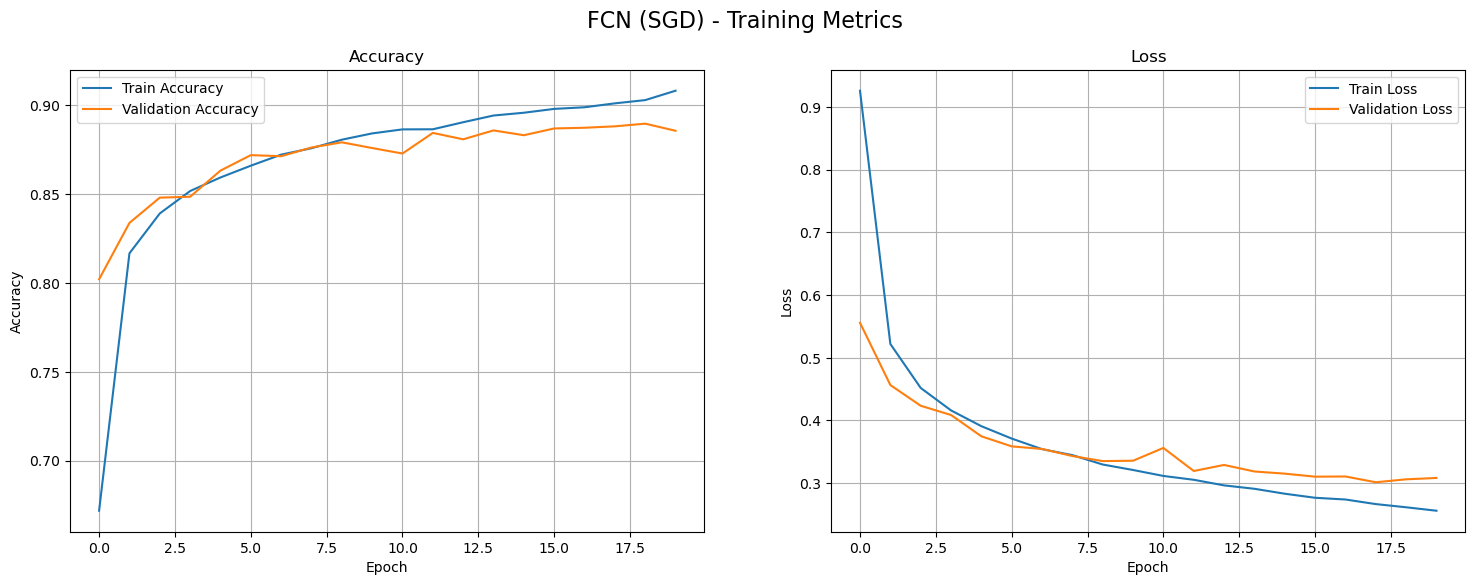

In [ ]:
# SGD optim

model_fcn_sgd = FCN()
optimizer_sgd = optim.SGD(model_fcn_sgd.parameters(), lr=0.01, momentum=0.9)

history_fcn_sgd, time_fcn_sgd = train_model(
    model_fcn_sgd, criterion, optimizer_sgd,
    train_loader, val_loader, NUM_EPOCHS,
    model_name="FCN (SGD)"
)

acc_fcn_sgd, _, _ = evaluate_model(model_fcn_sgd, test_loader)
results['FCN (SGD)'] = {
    'history': history_fcn_sgd,
    'time': time_fcn_sgd,
    'test_acc': acc_fcn_sgd
}
plot_metrics(history_fcn_sgd, "FCN (SGD)")

--- Training FCN (Adam) ---
Epoch 1/20 | Train Loss: 0.5767 - Train Acc: 0.7935 | Val Loss: 0.4043 - Val Acc: 0.8550
Epoch 2/20 | Train Loss: 0.3953 - Train Acc: 0.8564 | Val Loss: 0.3812 - Val Acc: 0.8592
Epoch 3/20 | Train Loss: 0.3579 - Train Acc: 0.8686 | Val Loss: 0.3552 - Val Acc: 0.8702
Epoch 4/20 | Train Loss: 0.3381 - Train Acc: 0.8759 | Val Loss: 0.3501 - Val Acc: 0.8730
Epoch 5/20 | Train Loss: 0.3188 - Train Acc: 0.8822 | Val Loss: 0.3578 - Val Acc: 0.8666
Epoch 6/20 | Train Loss: 0.3076 - Train Acc: 0.8857 | Val Loss: 0.3278 - Val Acc: 0.8817
Epoch 7/20 | Train Loss: 0.2931 - Train Acc: 0.8906 | Val Loss: 0.3322 - Val Acc: 0.8777
Epoch 8/20 | Train Loss: 0.2841 - Train Acc: 0.8935 | Val Loss: 0.3172 - Val Acc: 0.8847
Epoch 9/20 | Train Loss: 0.2746 - Train Acc: 0.8975 | Val Loss: 0.3136 - Val Acc: 0.8858
Epoch 10/20 | Train Loss: 0.2663 - Train Acc: 0.8993 | Val Loss: 0.3032 - Val Acc: 0.8885
Epoch 11/20 | Train Loss: 0.2588 - Train Acc: 0.9026 | Val Loss: 0.3051 - Val Acc

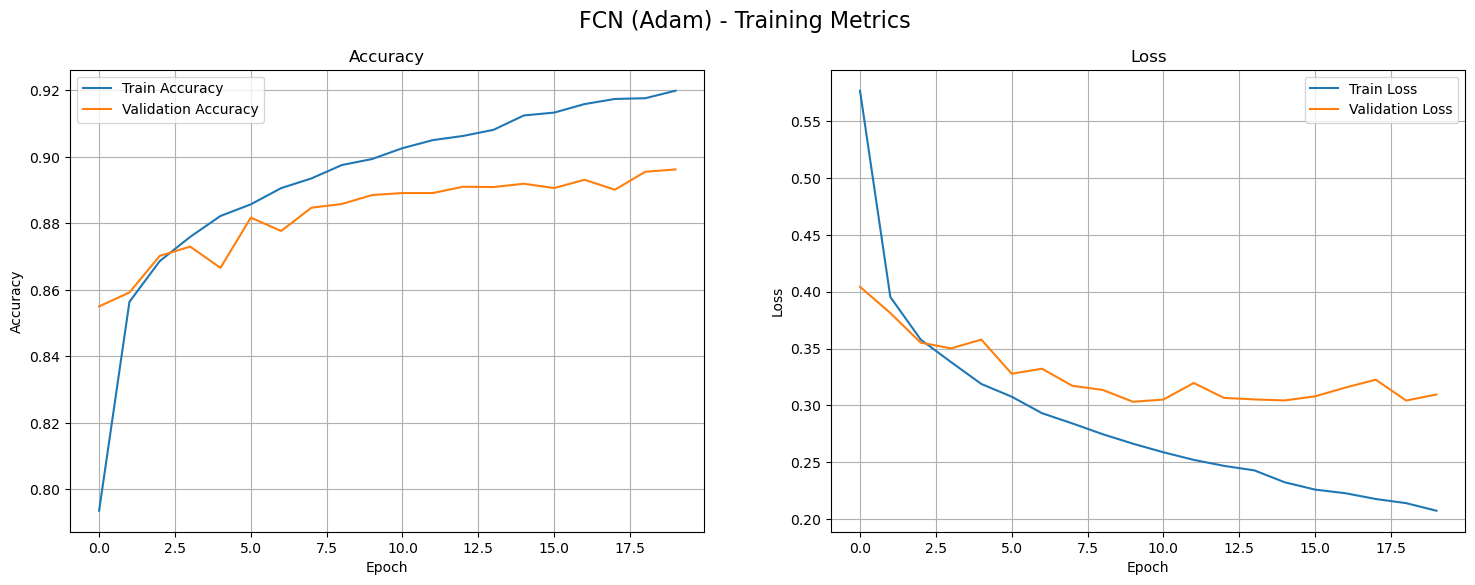

In [12]:
# Adam optim

model_fcn_adam = FCN()
optimizer_adam = optim.Adam(model_fcn_adam.parameters(), lr=0.001)

history_fcn_adam, time_fcn_adam = train_model(
    model_fcn_adam, criterion, optimizer_adam,
    train_loader, val_loader, NUM_EPOCHS,
    model_name="FCN (Adam)"
)

acc_fcn_adam, _, _ = evaluate_model(model_fcn_adam, test_loader)
results['FCN (Adam)'] = {
    'history': history_fcn_adam,
    'time': time_fcn_adam,
    'test_acc': acc_fcn_adam
}
plot_metrics(history_fcn_adam, "FCN (Adam)")

--- Training FCN (Adam + Scheduler) ---
Epoch 1/20 | Train Loss: 0.5803 - Train Acc: 0.7908 | Val Loss: 0.4200 - Val Acc: 0.8492
Epoch 2/20 | Train Loss: 0.3987 - Train Acc: 0.8541 | Val Loss: 0.3906 - Val Acc: 0.8573
Epoch 3/20 | Train Loss: 0.3575 - Train Acc: 0.8680 | Val Loss: 0.3580 - Val Acc: 0.8686
Epoch 4/20 | Train Loss: 0.3361 - Train Acc: 0.8775 | Val Loss: 0.3394 - Val Acc: 0.8740
Epoch 5/20 | Train Loss: 0.3196 - Train Acc: 0.8814 | Val Loss: 0.3675 - Val Acc: 0.8652
Epoch 6/20 | Train Loss: 0.3048 - Train Acc: 0.8857 | Val Loss: 0.3208 - Val Acc: 0.8823
Epoch 7/20 | Train Loss: 0.2966 - Train Acc: 0.8887 | Val Loss: 0.3199 - Val Acc: 0.8870
Epoch 8/20 | Train Loss: 0.2822 - Train Acc: 0.8955 | Val Loss: 0.3119 - Val Acc: 0.8878
Epoch 9/20 | Train Loss: 0.2779 - Train Acc: 0.8962 | Val Loss: 0.3130 - Val Acc: 0.8862
Epoch 10/20 | Train Loss: 0.2650 - Train Acc: 0.9012 | Val Loss: 0.3137 - Val Acc: 0.8867
Epoch 11/20 | Train Loss: 0.2588 - Train Acc: 0.9028 | Val Loss: 0.32

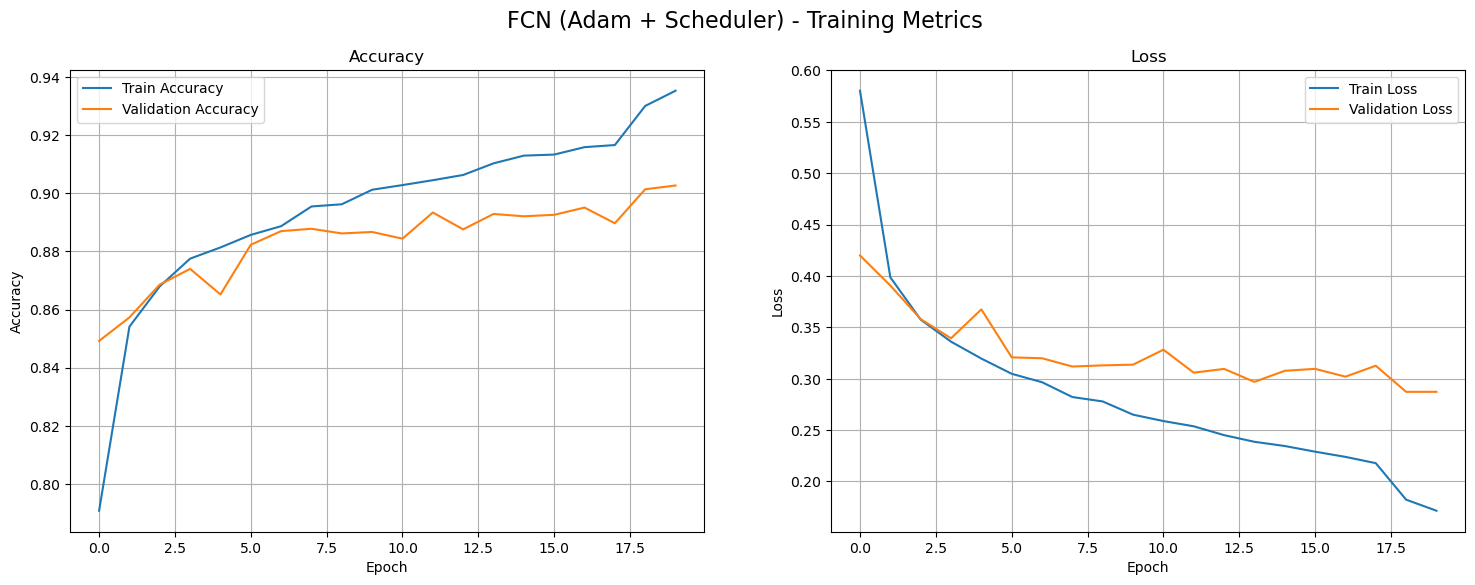

In [14]:
# adam optim & reduceLROnPlateau

model_fcn_sched = FCN()
optimizer_sched = optim.Adam(model_fcn_sched.parameters(), lr=0.001)
scheduler_sched = ReduceLROnPlateau(optimizer_sched, mode='min', factor=0.1, patience=3)

history_fcn_sched, time_fcn_sched = train_model(
    model_fcn_sched, criterion, optimizer_sched,
    train_loader, val_loader, NUM_EPOCHS,
    scheduler=scheduler_sched,
    model_name="FCN (Adam + Scheduler)"
)

acc_fcn_sched, labels_fcn, preds_fcn = evaluate_model(model_fcn_sched, test_loader)
results['FCN (Adam + Scheduler)'] = {
    'history': history_fcn_sched,
    'time': time_fcn_sched,
    'test_acc': acc_fcn_sched,
    'labels': labels_fcn,
    'preds': preds_fcn
}
plot_metrics(history_fcn_sched, "FCN (Adam + Scheduler)")

--- Training CNN (Adam + Scheduler) ---
Epoch 1/20 | Train Loss: 0.6264 - Train Acc: 0.7701 | Val Loss: 0.3884 - Val Acc: 0.8565
Epoch 2/20 | Train Loss: 0.3836 - Train Acc: 0.8621 | Val Loss: 0.3380 - Val Acc: 0.8728
Epoch 3/20 | Train Loss: 0.3342 - Train Acc: 0.8788 | Val Loss: 0.2953 - Val Acc: 0.8901
Epoch 4/20 | Train Loss: 0.3051 - Train Acc: 0.8896 | Val Loss: 0.2724 - Val Acc: 0.8990
Epoch 5/20 | Train Loss: 0.2803 - Train Acc: 0.8974 | Val Loss: 0.2782 - Val Acc: 0.8950
Epoch 6/20 | Train Loss: 0.2605 - Train Acc: 0.9051 | Val Loss: 0.2549 - Val Acc: 0.9072
Epoch 7/20 | Train Loss: 0.2460 - Train Acc: 0.9094 | Val Loss: 0.2409 - Val Acc: 0.9116
Epoch 8/20 | Train Loss: 0.2301 - Train Acc: 0.9157 | Val Loss: 0.2385 - Val Acc: 0.9144
Epoch 9/20 | Train Loss: 0.2193 - Train Acc: 0.9204 | Val Loss: 0.2364 - Val Acc: 0.9116
Epoch 10/20 | Train Loss: 0.2045 - Train Acc: 0.9248 | Val Loss: 0.2341 - Val Acc: 0.9160
Epoch 11/20 | Train Loss: 0.1930 - Train Acc: 0.9289 | Val Loss: 0.22

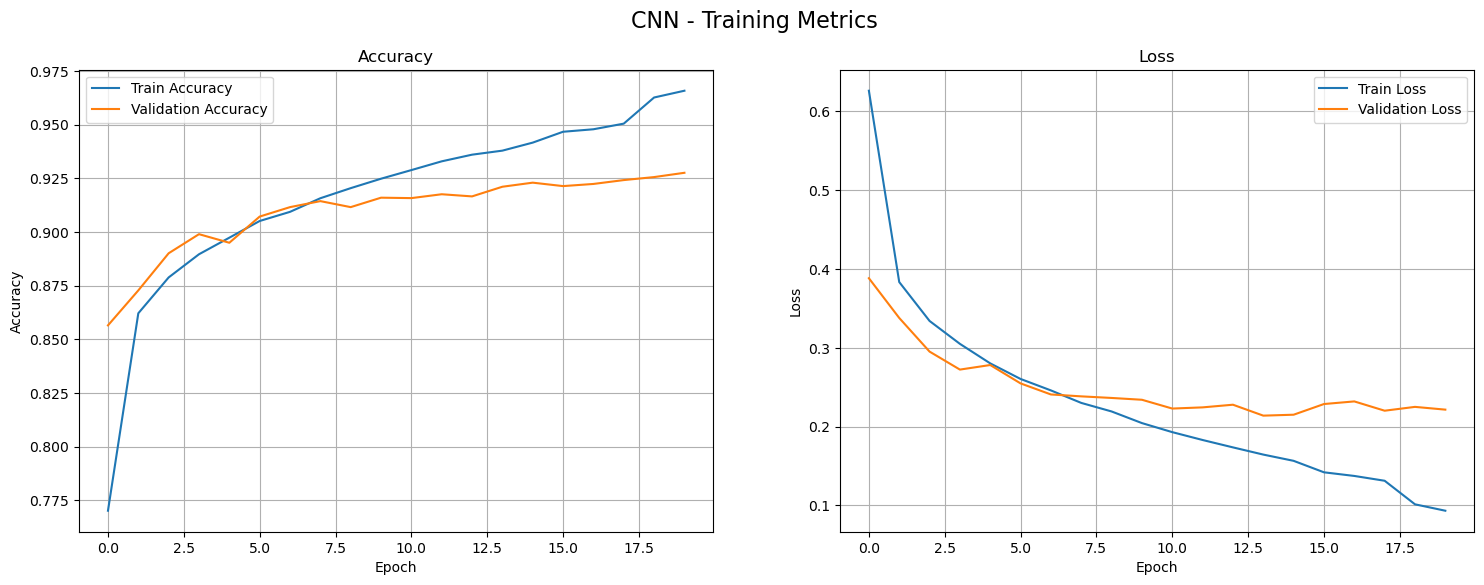

In [ ]:
# CNN

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_stack = nn.Sequential(
            # Input: (N, 1, 28, 28)
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            # (N, 32, 28, 28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # (N, 32, 14, 14)

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            # (N, 64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            # (N, 64, 7, 7)
        )

        self.flatten = nn.Flatten()

        self.fc_stack = nn.Sequential(
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_stack(x)
        x = self.flatten(x)
        logits = self.fc_stack(x)
        return logits

model_cnn = CNN()
optimizer_cnn = optim.Adam(model_cnn.parameters(), lr=0.001)
scheduler_cnn = ReduceLROnPlateau(optimizer_cnn, mode='min', factor=0.1, patience=3)

history_cnn, time_cnn = train_model(
    model_cnn, criterion, optimizer_cnn,
    train_loader, val_loader, NUM_EPOCHS,
    scheduler=scheduler_cnn,
    model_name="CNN (Adam + Scheduler)"
)

acc_cnn, labels_cnn, preds_cnn = evaluate_model(model_cnn, test_loader)
results['CNN'] = {
    'history': history_cnn,
    'time': time_cnn,
    'test_acc': acc_cnn,
    'labels': labels_cnn,
    'preds': preds_cnn
}
plot_metrics(history_cnn, "CNN")

--- Training ResNet18 (Fine-Tuned) ---
Epoch 1/20 | Train Loss: 0.4458 - Train Acc: 0.8444 | Val Loss: 0.2855 - Val Acc: 0.8972
Epoch 2/20 | Train Loss: 0.2507 - Train Acc: 0.9099 | Val Loss: 0.2496 - Val Acc: 0.9078
Epoch 3/20 | Train Loss: 0.2024 - Train Acc: 0.9258 | Val Loss: 0.2611 - Val Acc: 0.9031
Epoch 4/20 | Train Loss: 0.1676 - Train Acc: 0.9380 | Val Loss: 0.2462 - Val Acc: 0.9158
Epoch 5/20 | Train Loss: 0.1423 - Train Acc: 0.9464 | Val Loss: 0.2717 - Val Acc: 0.9044
Epoch 6/20 | Train Loss: 0.1197 - Train Acc: 0.9553 | Val Loss: 0.2525 - Val Acc: 0.9183
Epoch 7/20 | Train Loss: 0.1015 - Train Acc: 0.9627 | Val Loss: 0.2545 - Val Acc: 0.9184
Epoch 8/20 | Train Loss: 0.0868 - Train Acc: 0.9675 | Val Loss: 0.2719 - Val Acc: 0.9176
Epoch 9/20 | Train Loss: 0.0467 - Train Acc: 0.9841 | Val Loss: 0.2496 - Val Acc: 0.9310
Epoch 10/20 | Train Loss: 0.0313 - Train Acc: 0.9897 | Val Loss: 0.2608 - Val Acc: 0.9302
Epoch 11/20 | Train Loss: 0.0234 - Train Acc: 0.9926 | Val Loss: 0.275

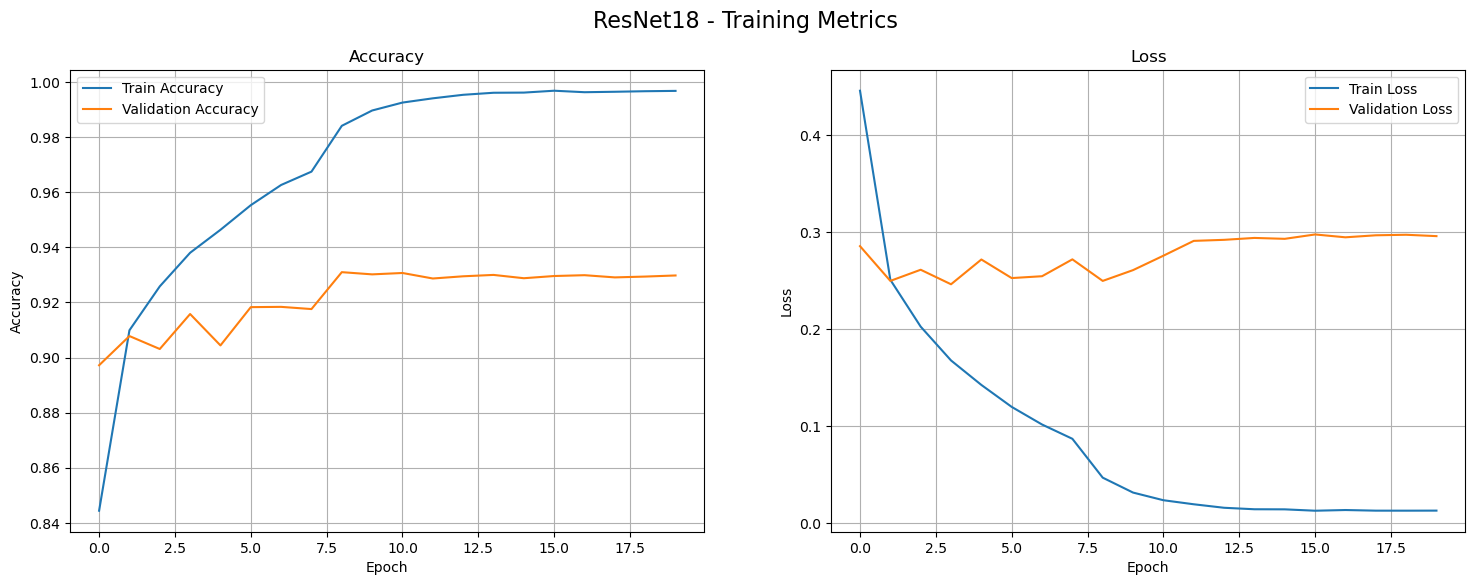

In [ ]:
# transfer learning

def create_resnet18_for_fashion_mnist():
    """
    Creates a ResNet18 model modified for 1-channel, 28x28 input
    and 10 output classes.
    """
    # Load pretrained ResNet18
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

    original_weights = model.conv1.weight.data
    model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
    with torch.no_grad():
        model.conv1.weight.data = original_weights.mean(dim=1, keepdim=True)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 10)

    return model

model_resnet = create_resnet18_for_fashion_mnist()
optimizer_resnet = optim.Adam(model_resnet.parameters(), lr=0.0001) # Use a smaller LR for fine-tuning
scheduler_resnet = ReduceLROnPlateau(optimizer_resnet, mode='min', factor=0.1, patience=3)

history_resnet, time_resnet = train_model(
    model_resnet, criterion, optimizer_resnet,
    train_loader, val_loader, NUM_EPOCHS,
    scheduler=scheduler_resnet,
    model_name="ResNet18 (Fine-Tuned)"
)

acc_resnet, labels_resnet, preds_resnet = evaluate_model(model_resnet, test_loader)
results['ResNet18'] = {
    'history': history_resnet,
    'time': time_resnet,
    'test_acc': acc_resnet,
    'labels': labels_resnet,
    'preds': preds_resnet
}
plot_metrics(history_resnet, "ResNet18")

In [ ]:
# def create_vit_for_fashion_mnist():
#     """
#     Creates a ViT-B-16 model modified for 10 output classes.
#     We will handle input size and channel mismatch in the training loop.
#     """
#     # Load pretrained ViT
#     model = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)

#     # Modify the classifier head for 10 output classes
#     num_ftrs = model.heads.head.in_features
#     model.heads.head = nn.Linear(num_ftrs, 10)
    
#     return model

# model_vit = create_vit_for_fashion_mnist()
# optimizer_vit = optim.Adam(model_vit.parameters(), lr=0.0001) 
# scheduler_vit = ReduceLROnPlateau(optimizer_vit, mode='min', factor=0.1, patience=3)

# history_vit, time_vit = train_model(
#     model_vit, criterion, optimizer_vit, 
#     train_loader, val_loader, NUM_EPOCHS, 
#     scheduler=scheduler_vit,
#     model_name="ViT (Fine-Tuned)"
# )

# acc_vit, labels_vit, preds_vit = evaluate_model(model_vit, test_loader)
# results['ViT (Fine-Tuned)'] = {
#     'history': history_vit,
#     'time': time_vit,
#     'test_acc': acc_vit,
#     'labels': labels_vit,
#     'preds': preds_vit
# }
# plot_metrics(history_vit, "ViT (Fine-Tuned)")

--- Training ViT (Fine-Tuned) ---


KeyboardInterrupt: 

--- Final Model Comparison ---
| Model                   | Test Accuracy | Train Time (s) |
|-------------------------|---------------|----------------|
| FCN (SGD)               |         88.14% |          16.63 |
| FCN (Adam)              |         89.10% |          17.79 |
| FCN (Adam + Scheduler)  |         89.49% |          17.52 |
| CNN                     |         92.32% |          97.44 |
| ResNet18                |         92.19% |         529.39 |


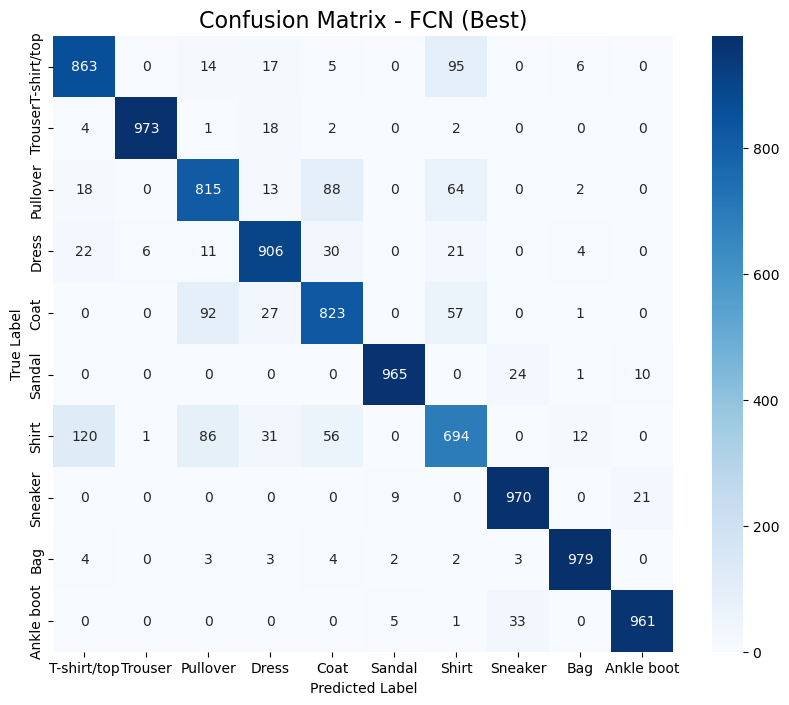

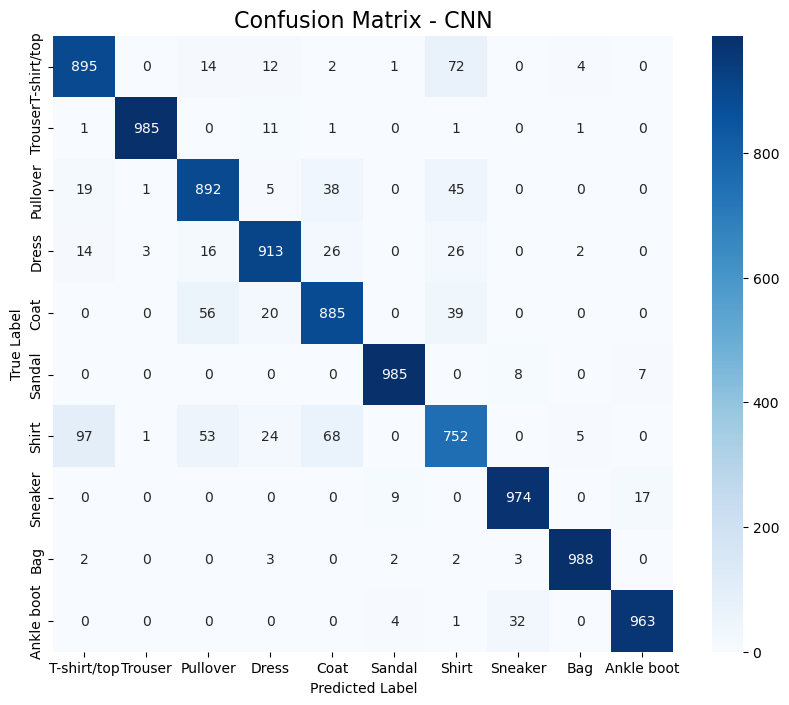

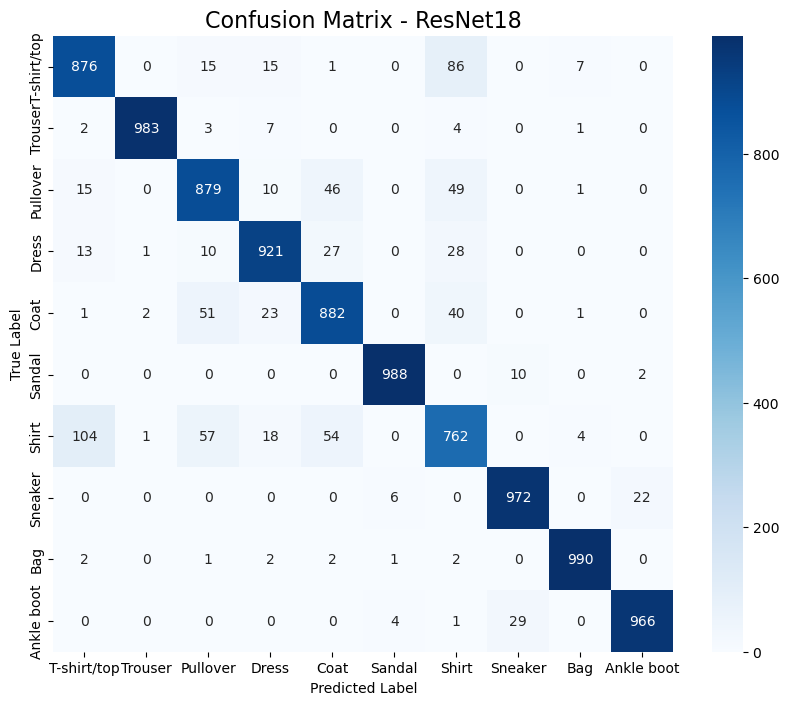

In [ ]:
print("--- Final Model Comparison ---")
print(f"| Model                   | Test Accuracy | Train Time (s) |")
print(f"|-------------------------|---------------|----------------|")
for name, res in results.items():
    if 'test_acc' in res:
        print(f"| {name:<23} | {res['test_acc'] * 100:>13.2f}% | {res['time']:>14.2f} |")

plot_confusion_matrix(results['FCN (Adam + Scheduler)']['labels'],
                      results['FCN (Adam + Scheduler)']['preds'],
                      class_names, "FCN (Best)")

plot_confusion_matrix(results['CNN']['labels'],
                      results['CNN']['preds'],
                      class_names, "CNN")

plot_confusion_matrix(results['ResNet18']['labels'],
                      results['ResNet18']['preds'],
                      class_names, "ResNet18")

# plot_confusion_matrix(results['ViT (Fine-Tuned)']['labels'],
#                       results['ViT (Fine-Tuned)']['preds'],
#                       class_names, "ViT (Fine-Tuned)")